# 📚 PyTorch Practice Notebook - Lecture 1 Exercises

**Based on:** SAIR PyTorch Mastery - Lecture 1: From NumPy to Production Neural Networks

**Instructions:** Complete the exercises below to test your understanding of PyTorch fundamentals. Try to solve them without looking at the original notebook first!

## 🔧 Setup & Imports

Run this cell first to set up your environment.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.9.0+cu126
CUDA available: True
GPU: Tesla T4


## 🎯 Exercise 1: Understanding Tensors & Autograd

### Part A: Manual Gradient Verification

**Task:** Create a simple computation graph and compute gradients both manually and with PyTorch's autograd.

Given:
- x = 3.0
- w = 2.0  
- b = 1.0

Compute: y = w*x + b, then loss = y²

**Your job:**
1. Create PyTorch tensors with gradient tracking
2. Compute the forward pass
3. Compute gradients using `.backward()`
4. Verify by manually computing ∂loss/∂w and ∂loss/∂x using chain rule

In [2]:
# =========== YOUR CODE HERE ===========
# Create tensors with requires_grad=True
x = torch.tensor([3.0], requires_grad = True)
w = torch.tensor([2.0], requires_grad = True)
b = torch.tensor([1.0], requires_grad = True)

# Forward pass: y = w*x + b, loss = y²
y = w * x + b
loss = y ** 2

# Backward pass
loss.backward()

# Print gradients
print("Gradients calcualted using builtin PyTorch grad function")
print(f"x grad = {x.grad.item()}")
print(f"w grad = {w.grad.item()}")
print(f"b grad = {b.grad.item()}")


# Manual verification
# Compute manually: ∂loss/∂w = ? and ∂loss/∂x = ?
#first will compute the gradient of y with respeact to w and x
dy_dw = x.t() 
dy_dx = w.t()
dy_db = 1

dloss_dy = 2 * y

#then calculate dloss / dw and dloss / dx
dloss_dw = dloss_dy * dy_dw
dloss_dx = dloss_dy * dy_dx
dloss_db = dy_db * dloss_dy

print("Results of manual calculation of the gradients")
print(f"∂loss/∂x = {dloss_dx.item()}")
print(f"∂loss/∂w = {dloss_dw.item()}")
print(f"∂loss/∂b = {dloss_db.item()}")
# =========================================

Gradients calcualted using builtin PyTorch grad function
x grad = 28.0
w grad = 42.0
b grad = 14.0
Results of manual calculation of the gradients
∂loss/∂x = 28.0
∂loss/∂w = 42.0
∂loss/∂b = 14.0


### Part B: Gradient Accumulation Demonstration

**Task:** Show what happens when you forget `optimizer.zero_grad()`.

1. Create a simple linear model
2. Run two training steps WITHOUT zero_grad
3. Show that gradients accumulate
4. Fix by adding zero_grad

In [3]:
# =========== YOUR CODE HERE ===========
# Create a simple model
model = nn.Linear(3, 1)
criteria = nn.MSELoss()

# Create dummy data
X = torch.randn(5, 3)
y = torch.randn(5, 1)

# Create optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# First forward-backward (no zero_grad)
# Print gradient after first iteration
print("Iteration 1")
pred1 = model(X)
loss1 = ((pred1 - y) ** 2).mean()
loss1.backward()
print(f"Weight gradient = {model.weight.grad[0,0].item():.4f}")

# Second forward-backward (no zero_grad)
# Print gradient after second iteration
print("Iteration 2")
pred2 = model(X)
loss2 = ((pred2 - y) ** 2).mean()
loss2.backward()
print(f"Weight gradient = {model.weight.grad[0,0].item():.4f}")

# Show that gradients doubled!

# Now do it correctly with zero_grad
# =========================================

Iteration 1
Weight gradient = 0.3354
Iteration 2
Weight gradient = 0.6707


## 🏗️ Exercise 2: Building Neural Networks with nn.Module

### Part A: Convert NumPy Network to PyTorch

**Task:** Convert this NumPy-style network to PyTorch using `nn.Module`.

Original NumPy network:
```python
class NumPyNetwork:
    def __init__(self):
        self.W1 = np.random.randn(10, 20)
        self.b1 = np.zeros(20)
        self.W2 = np.random.randn(20, 5)
        self.b2 = np.zeros(5)
        
    def forward(self, X):
        z1 = X @ self.W1 + self.b1
        a1 = np.maximum(0, z1)  # ReLU
        z2 = a1 @ self.W2 + self.b2
        return z2
```

Create a PyTorch version with:
1. Proper inheritance from `nn.Module`
2. PyTorch layers instead of manual weights
3. ReLU activation
4. Forward method

In [4]:
# =========== YOUR CODE HERE ===========
class PyTorchNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Define layers here
        self.layer1 = nn.Linear(10, 20)
        self.layer2 = nn.Linear(20, 5)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Implement forward pass
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        return z2
# =========================================

### Part B: Test Your Network

Test that your network works correctly:

In [5]:
# Test your network
model = PyTorchNetwork()

# Create dummy input
X_test = torch.randn(8, 10)  # batch_size=8, features=10

# Forward pass
output = model(X_test)

print(f"Input shape: {X_test.shape}")
print(f"Output shape: {output.shape}")
print(f"Output range: [{output.min():.3f}, {output.max():.3f}]")

Input shape: torch.Size([8, 10])
Output shape: torch.Size([8, 5])
Output range: [-0.624, 0.480]


## 🔄 Exercise 3: Complete Training Loop

### Part A: Fix the Buggy Training Loop

**Task:** This training loop has several bugs. Identify and fix them all.

Epoch 0: Loss = 1.3251
Epoch 10: Loss = 1.1051
Epoch 20: Loss = 1.0702
Epoch 30: Loss = 1.0461
Epoch 40: Loss = 1.0216


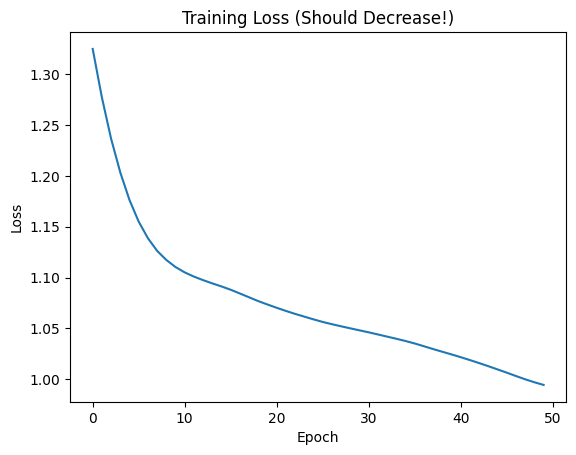

In [6]:
# =========== BUGGY CODE - FIX ME! ===========
class BuggyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(5, 10)
        self.layer2 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        return z2

# Create model and optimizer
model = BuggyNet()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Dummy data
X = torch.randn(100, 5)
y = torch.randn(100, 1)

# Training loop with bugs
losses = []
for epoch in range(50):
    # Forward pass
    predictions = model(X)

    loss = ((predictions - y) ** 2).mean()

    losses.append(loss.item())

    #optimizor zero grad is missing
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Plot results
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (Should Decrease!)')
plt.show()
# ============================================

### Part B: Write a Correct Training Loop

**Task:** Write a complete, correct training loop from scratch for a regression problem.

Requirements:
1. Create a neural network with 2 hidden layers
2. Use proper loss function for regression
3. Include all 6 training steps
4. Track and plot loss
5. Make it device-agnostic

Epoch 0: Loss = 1.0897
Epoch 20: Loss = 1.0591
Epoch 40: Loss = 1.0385
Epoch 60: Loss = 1.0239
Epoch 80: Loss = 1.0126


<function matplotlib.pyplot.show(close=None, block=None)>

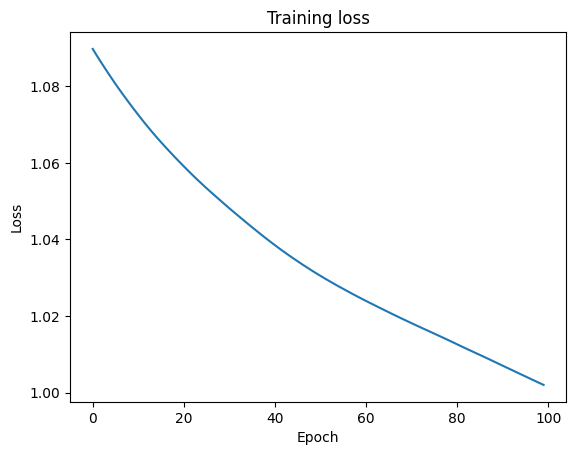

In [7]:
# =========== YOUR CODE HERE ===========
# 1. Define your network architecture
class RegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(7, 10)
        self.layer2 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        return z2

# 2. Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3. Create dummy data
X = torch.randn(200, 7)  # 200 samples, 7 features
y = torch.randn(200, 1)  # 200 target values

# 4. Initialize model, loss function, optimizer
model = RegModel()

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.to(device)
X = X.to(device)
y = y.to(device)

# 5. Training loop (100 epochs)
losses = []
for epoch in range(100):
#     # Training steps here...
      #forward pass
      pred = model(X)
      loss = criterion(pred, y)
      losses.append(loss.item())


      #backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 6. Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show

# =========================================

## 💾 Exercise 4: Model Persistence

### Part A: Save and Load Model Weights

**Task:** Train a simple model, save it, load it into a new model, and verify they produce identical predictions.

In [8]:
# =========== YOUR CODE HERE ===========
# 1. Create and train a simple model
model = nn.Sequential(
     nn.Linear(4, 10),
     nn.ReLU(),
     nn.Linear(10, 1)
)
# Create dummy data
X = torch.randn(200, 4)  # 200 samples, 7 features
y = torch.randn(200, 1)  # 200 target values

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 2. Train for a few epochs
for epoc in range(50):

    predictions = model(X)

    loss = criterion(predictions, y)
            
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 3. Save model weights
torch.save(model.state_dict(), 'model.weights.pt')

# 4. Create a NEW model with same architecture
new_model = nn.Sequential(
     nn.Linear(4, 10),
     nn.ReLU(),
     nn.Linear(10, 1)
)

# 5. Load saved weights into new model
new_model.load_state_dict(torch.load('model.weights.pt'))

# 6. Verify predictions match
test_input = torch.randn(5, 4)
original_pred = model(test_input)
loaded_pred = new_model(test_input)
print(f"Predictions match: {torch.allclose(original_pred, loaded_pred, rtol=1e-4)}")
# =========================================

Predictions match: True


### Part B: Create Training Checkpoints

**Task:** Save a checkpoint that allows resuming training. Include:
- Model state_dict
- Optimizer state_dict
- Epoch number
- Loss value

Then demonstrate loading and resuming training.

In [9]:
# =========== YOUR CODE HERE ===========
# 1. Train a model for 30 epochs
Tmodel = nn.Sequential(
     nn.Linear(4, 10),
     nn.ReLU(),
     nn.Linear(10, 1)
)
# Create dummy data
X = torch.randn(200, 4)  # 200 samples, 7 features
y = torch.randn(200, 1)  # 200 target values

criterion = nn.MSELoss()
optimizer = optim.Adam(Tmodel.parameters(), lr=0.001)

# 2. Train for a few epochs
for epoc in range(30):

    predictions = Tmodel(X)

    loss = criterion(predictions, y)
            
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
final_loss = loss.item()


# 2. Create checkpoint dictionary
checkpoint = {
     'epoch': 30,
     'model_state_dict': Tmodel.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     'loss': final_loss,
 }

# 3. Save checkpoint
torch.save(checkpoint, 'checkpoint.pth')

# 4. Create new model and optimizer
new_model = nn.Sequential(
    nn.Linear(4, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

new_optimizer = optim.Adam(new_model.parameters())

# 5. Load checkpoint
checkpoint_loaded = torch.load('checkpoint.pth')


# 6. Resume training from epoch 30
for epoch in range(checkpoint_loaded['epoch'], 60):
#     # Training loop
    print(f"Resumed training at epoch {epoch}")

# =========================================

Resumed training at epoch 30
Resumed training at epoch 31
Resumed training at epoch 32
Resumed training at epoch 33
Resumed training at epoch 34
Resumed training at epoch 35
Resumed training at epoch 36
Resumed training at epoch 37
Resumed training at epoch 38
Resumed training at epoch 39
Resumed training at epoch 40
Resumed training at epoch 41
Resumed training at epoch 42
Resumed training at epoch 43
Resumed training at epoch 44
Resumed training at epoch 45
Resumed training at epoch 46
Resumed training at epoch 47
Resumed training at epoch 48
Resumed training at epoch 49
Resumed training at epoch 50
Resumed training at epoch 51
Resumed training at epoch 52
Resumed training at epoch 53
Resumed training at epoch 54
Resumed training at epoch 55
Resumed training at epoch 56
Resumed training at epoch 57
Resumed training at epoch 58
Resumed training at epoch 59


## 🚀 Exercise 5: Real-World Application

### Part A: Boston Housing Prediction

**Task:** Use PyTorch to predict Boston housing prices.

Steps:
1. Load Boston housing dataset
2. Split into train/test
3. Standardize features
4. Create PyTorch model
5. Train model
6. Evaluate on test set

Test Loss: 19.2959


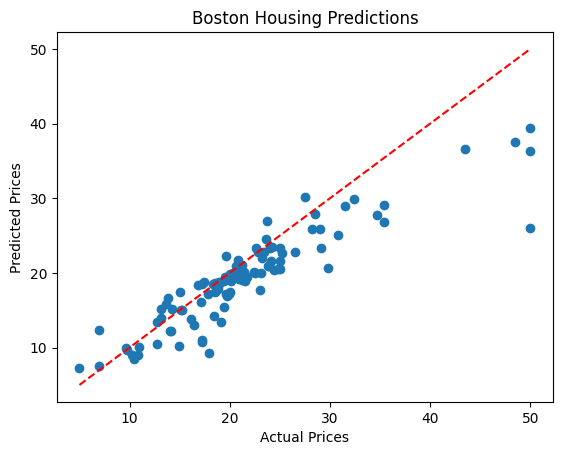

In [10]:
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# =========== YOUR CODE HERE ===========
# 1. Load dataset
#boston = load_boston()
boston = fetch_openml(name="Boston", version=1, as_frame=False)
X, y = boston.data, boston.target.astype(np.float32)

# 2. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype = torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype= torch.float32)

# 5. Define model architecture
class BostonPredictor(nn.Module):
     def __init__(self, input_size):
         super().__init__()
#         # Define layers
         self.layer1 = nn.Linear(input_size, 64)
         self.layer2 = nn.Linear(64, 32)
         self.layer3 = nn.Linear(32, 1)
         self.relu = nn.ReLU()
        
     def forward(self, x):
#         # Forward pass
         z1 = self.layer1(x)
         a1 = self.relu(z1)
         z2 = self.layer2(a1)
         a2 = self.relu(z2)
         z3 = self.layer3(a2)

         return z3
     
# 6. Create model instance
model = BostonPredictor(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 7. Training loop
for epoc in range(100):
        
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# 8. Evaluate on test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = nn.MSELoss()(test_predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")

# 9. Plot predictions vs actual
plt.scatter(y_test_tensor.numpy(), test_predictions.numpy())
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Boston Housing Predictions')
plt.show()
# =========================================

## 🧪 Challenge Problems

### Challenge 1: Debug a Non-Training Model

Create a model that SHOULD learn but doesn't (loss stays constant). Include at least 3 common bugs. Then write debugging code to identify each bug.

In [15]:
# =========== CHALLENGE 1 ===========
# Create a buggy model
class BuggyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Add bugs here
        self.layer1 = nn.Linear(13, 64)
        self.layer2 = nn.Linear(13, 32)
        self.layer3 = nn.Linear(13, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Add bugs here
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(x)
        a2 = self.relu(z2)
        z3 = self.layer3(x)

        return z3
    

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

lossess = []

X = torch.randn(10, 13)
y = torch.randn(10, 1)

# Debugging function
def debug_model(model, X, y):
    for epoch in range(5):
        """Identify why model isn't training"""
        print("Debugging Model...")

        optimizer.zero_grad()

        prediction = model(X)

        loss = criterion(prediction, y)
        lossess.append(loss.item())

        loss.backward()

        old_params = {name: param.clone().detach() for name, param in model.named_parameters()}

        optimizer.step()
        
        # Check 1: Are gradients being computed?
        print("--- Cechk if the gradietns are being computed or not ---")
        for name, param in model.named_parameters():
            if param.grad is not None:
                print(f"     {name}.grad: ✓ (not None)")
            else:
                print(f"     {name}.grad: ❌ None - gradient not flowing!")
            print()
        
        print()

        # Check 2: Are parameters updating?
        print("--- Check wether the parameters are changing or not ---")
        for name, param in model.named_parameters():
            change = torch.norm(old_params[name] - param)
            if change > 0:
                print(f"     {name} updated by: {change.item():.8f}")
            else:
                print(f"     {name} ❌ DID NOT UPDATE - check your forward pass connection!")
            print()
        
        print()
        
        # Check 3: Is loss changing?
        print("--- Checking if the loss is changing ---")
        for i in range(1, len(lossess)):
            if lossess[i] == lossess[i - 1]:
                print("Loss is not changing")
            else:
                print("Loss is changing")
            print()

        print()
        
        # Check 4: Are weights reasonable?
        print("--- Weight Health Check ---")
        for name, param in model.named_parameters():
            # Calculate statistics
            w_min = param.min().item()
            w_max = param.max().item()
            w_std = param.std().item()
            
            print(f"Layer: {name:15}")
            print(f"   Range: [{w_min:.4f}, {w_max:.4f}] | Std: {w_std:.4f}")

            if torch.isnan(param).any():
                print("   ❌ ERROR: Weights are NaN! (Learning rate is likely too high)")
            
            if w_std < 1e-7:
                print("   ⚠️ WARNING: Constant Weights (Layer might not be initialized or learning)")
                
            if w_max > 100 or w_min < -100:
                print("   ⚠️ WARNING: Exploding Weights (Check your normalization or LR)")
            print()

        print()
        
        # Check 5: Is learning rate appropriate?
        with torch.no_grad():
            for name, param in model.named_parameters():
                if param.grad is not None:
                    # Ratio of the step size to the actual weight magnitude
                    # A healthy ratio is usually around 1e-3 (0.001)
                    update_ratio = (optimizer.param_groups[0]['lr'] * param.grad.std() / (param.std() + 1e-7)).item()
                    
                    if update_ratio > 1e-1:
                        print(f"     ⚠️ WARNING: LR might be TOO HIGH (Ratio: {update_ratio:.4f})")
                    elif update_ratio < 1e-6:
                        print(f"     ⚠️ WARNING: LR might be TOO LOW (Ratio: {update_ratio:.8f})")
                    else:
                        print(f"     LR Ratio looks healthy: {update_ratio:.4f}")
                print()
        
        print()
        
        print("Debugging complete!")

# Create and debug model
model = BuggyModel()
debug_model(model, X, y)
# ===================================

Debugging Model...
--- Cechk if the gradietns are being computed or not ---
     layer1.weight.grad: ❌ None - gradient not flowing!

     layer1.bias.grad: ❌ None - gradient not flowing!

     layer2.weight.grad: ❌ None - gradient not flowing!

     layer2.bias.grad: ❌ None - gradient not flowing!

     layer3.weight.grad: ✓ (not None)

     layer3.bias.grad: ✓ (not None)


--- Check wether the parameters are changing or not ---
     layer1.weight ❌ DID NOT UPDATE - check your forward pass connection!

     layer1.bias ❌ DID NOT UPDATE - check your forward pass connection!

     layer2.weight ❌ DID NOT UPDATE - check your forward pass connection!

     layer2.bias ❌ DID NOT UPDATE - check your forward pass connection!

     layer3.weight ❌ DID NOT UPDATE - check your forward pass connection!

     layer3.bias ❌ DID NOT UPDATE - check your forward pass connection!


--- Checking if the loss is changing ---

--- Weight Health Check ---
Layer: layer1.weight  
   Range: [-0.2773, 0.2772] |

/tmp/ipython-input-881484757.py:90: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1857.)
  w_std = param.std().item()
/tmp/ipython-input-881484757.py:113: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1857.)
  update_ratio = (optimizer.param_groups[0]['lr'] * param.grad.std() / (param.std() + 1e-7)).item()


### Challenge 2: Create a Learning Rate Finder

Implement a learning rate finder that:
1. Trains the model with exponentially increasing learning rates
2. Plots loss vs learning rate
3. Identifies optimal learning rate range

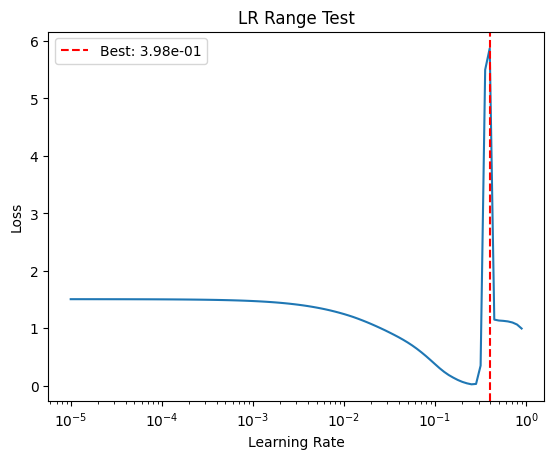

Optimal learning rate: 0.39810717055349426


In [17]:
# =========== CHALLENGE 2 ===========

class FindOLrModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Add bugs here
        self.layer1 = nn.Linear(13, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Add bugs here
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.relu(z2)
        z3 = self.layer3(a2)

        return z3
    

lossess = []

X = torch.randn(10, 13)
y = torch.randn(10, 1)

def find_learning_rate(model, X, y, min_lr=1e-5, max_lr=1, steps=100):
    """Find optimal learning rate range"""
    optimizer = optim.SGD(model.parameters(), lr=min_lr)
    criterion = nn.MSELoss()
    
    # Calculate the multiplier for exponential growth
    # This will ensures we cover the distance between min and max in 'steps'
    lr_factor = (max_lr / min_lr) ** (1 / steps)
    
    lrs = []
    losses = []
    current_lr = min_lr
    
    for i in range(steps):
        # Update the learning rate in the optimizer
        for param_group in optimizer.param_groups:
            param_group['lr'] = current_lr
            
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        # Record stats
        lrs.append(current_lr)
        losses.append(loss.item())
        
        # Update LR for next step
        current_lr *= lr_factor
        
        # Optional: Stop if loss explodes (NaN or too high)
        if torch.isnan(loss) or loss.item() > 100:
            break

    # To find the 'best' LR automatically: 
    # We look for the steepest gradient (max drop in loss)
    # Using a simple difference between consecutive losses
    loss_diff = [losses[i] - losses[i-1] for i in range(1, len(losses))]
    best_idx = loss_diff.index(min(loss_diff)) # Index of the largest drop
    best_lr = lrs[best_idx]

    # Plotting for visualization
    plt.plot(lrs, losses)
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.title('LR Range Test')
    plt.axvline(x=best_lr, color='r', linestyle='--', label=f'Best: {best_lr:.2e}')
    plt.legend()
    plt.show()
    
    return best_lr

# Usage:
model = FindOLrModel()
optimal_lr = find_learning_rate(model, X, y)
print(f"Optimal learning rate: {optimal_lr}")
# ===================================

## 📊 Assessment Questions

Answer these questions in markdown cells:

### Q1: What's the difference between these two lines?
```python
x = torch.tensor([1.0, 2.0, 3.0])
x = torch.Tensor([1.0, 2.0, 3.0])
```
torch.tensor creates a new tensor from the data(either python list or numpy array), while torch.Tensor creates a constructor of the default tensor type and uses the global default dtype so if the global dtype is changed, it will change to the new dtype which can create a bug.


### Q2: When should you use `model.train()` vs `model.eval()`?

We use `model.train()` to set the model to the training which is when we built a new model and we want the model to learn the accurate parameters(weight and bias) values by iterating throguh the training data for rveral times and learned the correct parameters values or in other words learn the pattrens. In addition to that, in this mode if we are using dropout layers then it will be enabled, as in the evaluation mode we don't need dropout and must be disabled, along with enabling dividing the learning dataset to batchs before updating the parameters which make the training more stable as the gradients are averged over the entire dataset. After that the model is now read to be used on new data for testing or evaluating it ability to learn on new unseen data, here we use `model.eval()` to set the model for evaluation mode which disable some behaviors like dropout and the dataset will be used as whole not in batchs.


### Q3: Why do we need both `loss.backward()` and `optimizer.step()`? Can't one function do both?

No each function has specific role and result, the `loss.backward()` calculate the gradients of the model parameters and store them in the .grad attribute of the parameter but it doesn't change the parameter's values, the `optimizer.step()` does update the values of the parameters using the calculated gradients.


### Q4: What happens if you forget to call `optimizer.zero_grad()` in a training loop?

The parameters values will be added to new iteration paramters values.


### Q5: How do you move a model to GPU? What common error occurs if you forget something?

1. We use cuda option to set the device to GPU if available using the following command `model = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`.

2. We move the model to device using `model.to(device)` command, where the device is set to cpu based on previous step.

3. Using the same command we move the inputs and outputs to the device as well(`inputs.to(device)` / `outputs.to(device)`)


### Q6: What's the difference between saving `model.state_dict()` and saving the entire model with `torch.save(model, ...)`?
The `model.state_dict()` command saves only the model parameters values, which can be loaded later in any model with the same structure. While the `torch.save(model, ...)` saves the model structure and parameters values in one file which can break easily if the code changed and it saves the class definition as it is.


### Q7: Why is it important to use `with torch.no_grad():` during inference?

To disable tracking gradients values as the model is not being trained.

## ✅ Progress Tracker

Check off exercises as you complete them:

- [ ] Exercise 1A: Manual Gradient Verification
- [ ] Exercise 1B: Gradient Accumulation
- [ ] Exercise 2A: Convert NumPy Network
- [ ] Exercise 2B: Test Network
- [ ] Exercise 3A: Fix Buggy Training Loop
- [ ] Exercise 3B: Write Correct Training Loop
- [ ] Exercise 4A: Save/Load Model Weights
- [ ] Exercise 4B: Training Checkpoints
- [ ] Exercise 5: Boston Housing Prediction
- [ ] Challenge 1: Debug Non-Training Model
- [ ] Challenge 2: Learning Rate Finder
- [ ] Assessment Questions Q1-Q7

## 🏆 Completion Certificate

Once you complete all exercises, you've mastered:
- ✅ PyTorch tensor operations and autograd
- ✅ Building neural networks with nn.Module
- ✅ Complete training loops
- ✅ Model persistence
- ✅ Real-world applications
- ✅ Debugging skills

**You're ready for Lecture 2: Advanced PyTorch Patterns!** 🎉

***Hands on Machine Learning with Skikit Learn and PyTorch***

**Part 2 Chapter 1 Excercie**



3. Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?
Becuase logistic regression produce probability score rather than the hard classification results the the perceptron gives, and this soft classification is needed in real life to know how confident is the classifier about the given result.

    We can tweak a perceptron by changing the activatin function to be Sigmoid function.


4. Why was the sigmoid activation function a key ingredient in training the first MLPs?

   Sigmoid activation function allowed for the backpropagation function, as in the classic perceptron the step function was used.

5. Name three popular activation functions.

   1. The Sigmoid.
   2. The Hyperbolic Tangent (tanh).
   3. The Rectified Linear Unit (ReLU).

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

   A. What is the shape of the input matrix X?

   - Number of samples: n
   - Number of Features: 10
   
   X shape is n x 10


   B. What are the shapes of the hidden layer’s weight matrix W and bias vector b ?

   The weight matrix shape is 10 x 50 as the layer is receiving 10 inputs and has 50 neurons.

   The bias shape is 50 or 1 x 50 as for each neuron assigened one bias.


   C. What are the shapes of the output layer’s weight matrix W and bias vector b ?

   The weight matrix shape is 50 x 3 as the layer is receiving 50 inputs and has 3 neurons.

   The bias shape is 3 or 1 x 3 as for each neuron assigened one bias.


   D. What is the shape of the network’s output matrix Y?

   The shape of Y matrix is n x 3.


   E. Write the equation that computes the network’s output matrix Y as a function of X, W , b , W , and b .

   Y = Relu(Relu(XW1 + b1)W2 + b2)

7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?

- Since the problem is classification (spam/ham) then we will need only one output neuron. For activation function will use Sigmoid which will output 0 and 1 that represent the probability of the positive class.
- For the MNIST dataset we will need 10 neuron, 1 for each class as this task is multiclassification and each class is mutually exclusive. And will use the softmax for the entire output layer to ensure that all the estimated probabilities are between 0 and 1 and sum up to 1.
- For predicting the housing prices which is a regression problem will need one output neuron and no activation function needed.

8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

- Backpropagation is the full learning cycle in artificial  neuron networks which contains forward pass, error calculation(loss), and backward pass.
    
    It works by:
    1. Calculate the output of each neuron in each layer and it is then passed to the next layer until we reach the final layer.
    2. Calculate the error which distance between the real output values and the predicted or the one created during the forwards pass.
    3. Calculating the gradients of the loss function and the parameters at each layer. It work by using the chain rule to compute how much each parameter in the output layer contributed to the error which implies claculating the gradients at each previous layer and multiply it with the gradients of the layer perfore it.

- Reverse-mode autodiff is a technique to compute all the gradients automatically and efficiently. it represent the backward pass or the mathimatical engine used to calculate the gradients.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

    1. Number of hidden layers
    2. Number of neurons per hidden layer
    3. Learning rate
    4. Batch size
    5. Optimizer
    6. Activation function
    7. Number of iteration

    Overfitting indicate the model is complex so we can try to reduce its complexity by decreasing the number of hidden layers or the number of neurons per hidden layer. Also reducing the batch size to have more stable training, although there is depate in the field about it.

10. Train a deep MLP on the CoverType dataset. You can load it using sklearn.datasets.fetch_covtype() . See if you can get over 93% accuracy on the test set by fine-tuning the hyperparameters, manually and/or using RandomizedSearchCV .

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- DATA PREPARATION ---
X, y = fetch_covtype(return_X_y=True)
y = y - 1  # Adjust labels to 0-6 for PyTorch CrossEntropy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
train_ds = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
test_ds = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

# --- TUNING PARAMETER 4: Batch Size ---
train_loader = DataLoader(train_ds, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=1024, shuffle=False)

# --- TUNING PARAMETERS 1, 2, & 6: Architecture and Activation ---
class TunableMLP(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 512),  # Hidden Layer 1
            nn.BatchNorm1d(512),
            nn.ReLU(),                   # Activation Function
            
            nn.Linear(512, 512),         # Hidden Layer 2
            nn.BatchNorm1d(512),
            nn.ReLU(),
            
            nn.Linear(512, 256),         # Hidden Layer 3
            nn.BatchNorm1d(256),
            nn.ReLU(),
            
            nn.Linear(256, n_classes)    # Output Layer
        )
        
    def forward(self, x):
        return self.layers(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TunableMLP(54, 7).to(device)

# --- TUNING PARAMETER 5: Optimizer ---
optimizer = optim.Adam(model.parameters(), lr=0.001) # Parameter 3: Learning Rate
criterion = nn.CrossEntropyLoss()

# --- TUNING PARAMETER 7: Number of Iterations (Epochs) ---
for epoch in range(50):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Evaluation every 5 epochs
    if epoch % 5 == 0:
        model.eval()
        correct = 0
        with torch.no_grad():
            for b_x, b_y in test_loader:
                b_x, b_y = b_x.to(device), b_y.to(device)
                preds = model(b_x).argmax(dim=1)
                correct += (preds == b_y).sum().item()
        accuracy = correct / len(y_test)
        print(f"Epoch {epoch} | Test Accuracy: {accuracy:.4f}")